# 1) Setup

In [61]:
import h2o
from h2o.automl import H2OAutoML
from h2o.sklearn import H2OAutoMLClassifier
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.301-b09, mixed mode)
  Starting server from C:\Users\pyliu\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pyliu\AppData\Local\Temp\tmpal6l251s
  JVM stdout: C:\Users\pyliu\AppData\Local\Temp\tmpal6l251s\h2o_pyliu_started_from_python.out
  JVM stderr: C:\Users\pyliu\AppData\Local\Temp\tmpal6l251s\h2o_pyliu_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_pyliu_5875w8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.492 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import pickle
import networkx as nx
import re
import random

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [4]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_maxrange import *
from Normal_Gamma_bayes_nothreshold import *
from Normal_Gamma_bayes_initial import *
from Normal_Gamma_bayes_update import *
from Normal_Gamma_bayes_updateone import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *
from update_mean import *
from update_var import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_ks_threshold import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_origin_target import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) regression
from get_features import *

from regression_dataloader import *
from regression_dataloader_nofit import *
from regression_dataloader_square import *
from regressor_pointtest import *
from regressor_nsimilar import *

#6) Threshold-classification
from ks_dataloader import *


#6) Evaluation
from evaluate_groundtruth import *
from evaluate_offset import *

from evaluate_mle import *
from evaluate_mle_ensemble import *
from evaluate_bayes import *
from evaluate_bayes_ensemble import *

from random_prior import *
from specific_prior import *
from evaluate_prior import *
from evaluate_random import *
from evaluate_random_obs import *
from evaluate_random_ensemble import *
from evaluate_random_multiedge import *

from similar_length import *
from evaluate_length import *
from evaluate_length_ensemble import *
from evaluate_length_ensemble_obs import *
from compare_similar import *  #check supposedly similar distributions
from compare_length import *

from similar_classification import *
from evaluate_classification import *
from evaluate_classification_ensemble import *
from evaluate_classification_multiedge import *
from compare_classification import *

from similar_regression import *
from evaluate_regression import *
from evaluate_regression_ensemble import *
from evaluate_regression_multiedge import *
from compare_regression import *

from evaluate_specific_prior import *
from similar_length_fast import *
from start_ks_length import *
from start_ks_random import *
from similar_classification_fast import *
from start_ks_classification import *
from similar_regression_fast import *
from start_ks_regression import *

print("done")

done


In [5]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


In [6]:
edge = "WayPoint76_Lift1"
seed = 1
print("edge is defined")

edge is defined


# 2) Clustering + Classification

## 2a) Clustering on Training map

In [7]:
#train map
threshold_matrix_tsc, threshold_edges_tsc, lone_edges_tsc = distances_ks_threshold(df_tsc_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_tsc), len(lone_edges_tsc))

0 edges: 0.04542374610900879 secs
20 edges: 10.927068948745728 secs
40 edges: 19.900938510894775 secs
60 edges: 27.741275548934937 secs
80 edges: 35.22139644622803 secs
100 edges: 42.33673620223999 secs
120 edges: 49.295276165008545 secs
140 edges: 56.177077293395996 secs
160 edges: 62.885098695755005 secs
180 edges: 69.52192974090576 secs
200 edges: 74.80553388595581 secs
220 edges: 74.81846737861633 secs
240 edges: 74.83342742919922 secs
Time taken: 74.84040904045105 secs
181 15


Optimum no. of clusters: 6
Max silhouette coeff: 0.2560867329196153


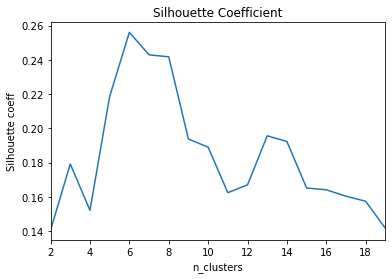

In [8]:
n_clusters, s_list = optimum_clusters(threshold_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [9]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_tsc )
print(labels)
threshold_clusters_tsc = pd.DataFrame(index = np.arange(len(threshold_edges_tsc)),columns = ["edge_id", "cluster_id"])
threshold_clusters_tsc["edge_id"] = threshold_edges_tsc
threshold_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 1 2 2 2 2 2 3 1 2 2 1 1 0 1 1 2 1 2 2 2 2 2 5 2 2 2 2 0 0 5 2 4 1 5 5 5
 2 5 2 1 2 2 5 5 2 2 2 0 5 0 1 0 1 5 0 5 5 2 5 4 5 0 2 0 0 2 4 5 1 2 1 1 0
 1 2 5 1 2 0 1 1 0 2 5 2 2 2 2 0 2 2 2 2 0 2 1 1 0 2 1 1 1 5 2 2 5 1 1 3 2
 2 5 2 1 1 1 1 1 2 1 0 0 5 5 1 1 1 2 2 2 2 1 1 5 2 5 2 2 1 2 2 1 5 5 1 2 1
 1 2 2 2 2 5 5 2 1 5 5 5 1 2 1 1 1 2 1 1 2 2 0 5 2 0 2 5 1 2 2 2 2]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


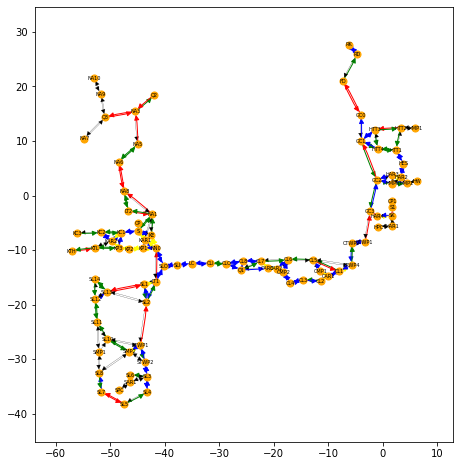

In [10]:
G = draw_clusters_tsc("tsc_map.yaml", threshold_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_threshold_tsc.png", dpi = 1000, bbox_inches = "tight")

## 2b) Clustering on Test Map (for validation in 8c)

In [11]:
#test map
threshold_matrix_aaf, threshold_edges_aaf, lone_edges_aaf = distances_ks_threshold(df_aaf_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_aaf), len(lone_edges_aaf))

0 edges: 0.05236697196960449 secs
20 edges: 25.805071115493774 secs
40 edges: 44.64566135406494 secs
60 edges: 60.496901750564575 secs
80 edges: 74.7674629688263 secs
100 edges: 87.56313490867615 secs
120 edges: 100.13459515571594 secs
140 edges: 112.25446581840515 secs
160 edges: 124.32904815673828 secs
180 edges: 133.20874500274658 secs
200 edges: 133.2316837310791 secs
Time taken: 133.2446506023407 secs
160 15


Optimum no. of clusters: 8
Max silhouette coeff: 0.34741614283384503


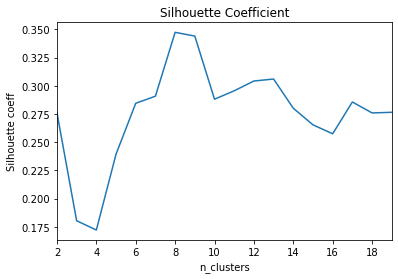

In [12]:
n_clusters, s_list = optimum_clusters(threshold_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

In [13]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_aaf )
print(labels)
threshold_clusters_aaf = pd.DataFrame(index = np.arange(len(threshold_edges_aaf)),columns = ["edge_id", "cluster_id"])
threshold_clusters_aaf["edge_id"] = threshold_edges_aaf
threshold_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[1 4 4 4 1 1 5 1 1 1 3 3 4 1 4 4 1 1 1 3 5 1 1 4 1 1 1 1 3 1 4 4 1 3 3 3 1
 3 1 0 0 1 1 0 1 0 3 3 5 1 1 5 1 4 3 3 0 3 2 1 1 1 1 1 2 1 3 0 2 1 1 0 1 3
 7 3 0 1 1 0 0 2 0 0 1 0 0 7 4 1 0 1 1 5 0 4 4 4 1 4 1 4 4 1 1 1 0 3 4 5 4
 5 3 0 1 1 1 0 5 6 3 5 3 4 5 4 5 1 1 0 1 0 4 4 4 1 4 0 4 5 0 1 3 3 1 3 4 1
 1 0 1 6 1 1 0 5 0 5 1 3]
8 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
Edges without enough data are black


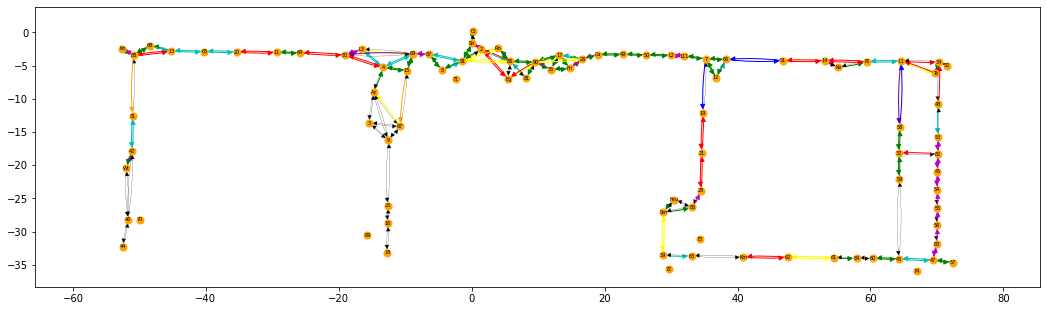

In [14]:
G = draw_clusters("aaf_map.yaml", threshold_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_threshold_aaf.png", dpi = 1000, bbox_inches = "tight")

## 2c) Binary Classifier with H2O

In [15]:
#Load data into binary label format
#training map
df_class_diff_tsc = dataloader6(threshold_clusters_tsc, filename = "tsc_map.yaml")
#testing map
df_class_diff_aaf = dataloader6(threshold_clusters_aaf, filename = "aaf_map.yaml")

Time taken (dataloader6): 20.694727182388306 secs
Time taken (dataloader6): 16.44657826423645 secs


In [63]:
features = ["edge_length_diff","origin_connections_diff","target_connections_diff",
            "total_connections_diff","max_angle_diff","sum_angle_diff"]
target = "same_cluster"
all_features = ["edge_length_diff","origin_connections_diff","target_connections_diff",
            "total_connections_diff","max_angle_diff","sum_angle_diff","same_cluster"]
h2o_train_clcl = h2o.H2OFrame(df_class_diff_tsc[all_features])
h2o_train_clcl[target] = h2o_train_clcl[target].asfactor()
h2o_test_clcl = h2o.H2OFrame(df_class_diff_aaf[all_features])
h2o_test_clcl[target] = h2o_test_clcl[target].asfactor()
"""
X_train_clcl = df_class_diff_tsc[features].astype(float)
y_train_clcl = df_class_diff_tsc[target].astype(bool)
X_test_clcl = df_class_diff_aaf[features].astype(float)
y_test_clcl = df_class_diff_aaf[target].astype(bool)
"""

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


'\nX_train_clcl = df_class_diff_tsc[features].astype(float)\ny_train_clcl = df_class_diff_tsc[target].astype(bool)\nX_test_clcl = df_class_diff_aaf[features].astype(float)\ny_test_clcl = df_class_diff_aaf[target].astype(bool)\n'

In [64]:
h2o_train_clcl.describe()

Rows:16290
Cols:7




,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff,same_cluster
type,real,int,int,int,real,real,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,
mean,1.571834310721543,1.0728054020871776,1.0752608962553705,1.7879680785758134,0.6394924267838107,1.9854344242274513,
maxs,6.852686523754455,4.0,4.0,7.0,3.1278779820712095,8.914540568526544,
sigma,1.2997577448532645,0.8698062327352233,0.8751566040783252,1.3692563302281213,0.6220013993060369,1.4919748199211211,
zeros,76,4467,4469,2824,62,31,
missing,0,0,0,0,0,0,0
0,1.5712432840205772,2.0,0.0,2.0,1.414287884470239,1.414287884470239,0
1,1.3225063174934657,0.0,0.0,0.0,0.8962258277930677,0.8962258277930677,0
2,2.0719551740570763,0.0,0.0,0.0,0.9498387533871644,0.9498387533871644,0


In [65]:
#automl
n_models = 1
random_state = 1
tic = time.time()

aml_clcl = H2OAutoML(max_models = n_models,
                              seed = random_state,
                              include_algos = ["GLM","DeepLearning", "DRF", "GBM", "StackedEnsemble"],
                              stopping_metric = "mean_per_class_error")
aml_clcl.train(x=features, y=target,
    training_frame=h2o_train_clcl, validation_frame=h2o_test_clcl)
toc = time.time()
print(f"Time take (AutoML): {np.round(toc-tic,2)} secs")

H2OServerError: HTTP 500 Server Error:
Server error java.lang.NullPointerException:
  Error: Caught exception: java.lang.NullPointerException
  Request: None


In [ ]:
aml_clcl.estimator.leaderboard

In [ ]:
model_type = "GBM"
model_ids = list(aml_clcl.estimator.leaderboard["model_id"].as_data_frame().iloc[:,0])
model_id = [model for model in model_ids if model_type in model][0]
model = h2o.get_model(model_id)
print(model_id)
model.summary()

In [ ]:
#when making predictions, convert binary features to categorical type using h2o.H2OFrame.asfactor()
